#### Introduction 

If you have some background in machine learning and you'd like to learn how to quickly improve the quality of your models, you're in the right place! In this course, you will accelerate your machine learning expertise by learning how to:

- tackle data types often found in real-world datasets **(missing values, categorical variables)**,
- **design pipelines** to improve the quality of your machine learning code,
- use advanced techniques for model validation **(cross-validation)**,
- build state-of-the-art models that are widely used to win Kaggle competitions **(XGBoost)**, and
avoid common and important data science mistakes **(leakage)**.

As a warm-up, you'll review some machine learning fundamentals and submit your initial results to a Kaggle competition.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split 

X_full = pd.read_csv("train.csv", index_col="Id") 
X_test_full = pd.read_csv("test.csv", index_col="Id")

# obtain target and preds 
y = X_full.SalePrice 
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy() 
X_test = X_test_full[features].copy() 

# train / test split 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                    random_state=0)

In [5]:
# data overview 
X_train.head() 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


The next code cell defines five different random forest models.  Run this code cell without changes.  (_To review **random forests**, look [here](https://www.kaggle.com/dansbecker/random-forests)._)

In [6]:
from sklearn.ensemble import RandomForestRegressor 

# Define model 
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20,random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1,model_2,model_3,model_4,model_5]

To select the best model out of the five, we define a function `score_model()` below.  This function returns the mean absolute error (MAE) from the validation set.  Recall that the best model will obtain the lowest MAE.  (_To review **mean absolute error**, look [here](https://www.kaggle.com/dansbecker/model-validation).)_


In [7]:
from sklearn.metrics import mean_absolute_error 

def score_model(model,X_t=X_train,X_v=X_valid,y_t=y_train,y_v=y_valid): 
    model.fit(X_t,y_t) 
    preds = model.predict(X_v) 
    return mean_absolute_error(y_v,preds) 

for i in range(0,len(models)): 
    mae = score_model(models[i]) 
    print("Model %d MAE: %d" % (i+1,mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


#### Step 1: Evaluate several models

Use the above results to fill in the line below.  Which model is the best model?  Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [ ]:
# Fill in the best_model
best_model = model_3 

#### Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [8]:
from sklearn.ensemble import RandomForestRegressor 

my_model = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)


#### Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!  First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.  _(If you see a "Submit Predictions" button instead of a "Join Competition" button, you have already joined the competition, and don't need to do so again.)_

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Data** tab near the top of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


In [9]:
# fit the model to the training data 
my_model.fit(X,y) 

preds_test = my_model.predict(X_test) 

# Save prediction 
output = pd.DataFrame({"Id": X_test.index,
                    "SalePrice": preds_test})
output.to_csv('submission.csv',index=False)

### Exercise: Missing Value

In this tutorial, you will learn three approaches to dealing with missing values. Then you'll compare the effectiveness of these approaches on a real-world dataset.


In [10]:
# Setup 
import pandas as pd 
from sklearn.model_selection import train_test_split 

# Read the data 
X_full = pd.read_csv("train.csv",index_col='Id')
X_test_full = pd.read_csv("test.csv",index_col="Id")

#Remove rows with nan value, separate target from predictors 
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True) 
y = X_full.SalePrice 
X_full.drop(['SalePrice'],axis=1,inplace=True) 

# to keep it simple, use only numerical 
X = X_full.select_dtypes(exclude=['object']) 
X_test = X_test_full.select_dtypes(exclude=['object'])

# train / test split 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,1774,1822,1828,0,0,1828,0,0,2,0,3,1,9,1,2007.0,3,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,894,894,894,0,0,894,0,0,1,0,2,1,5,0,1962.0,1,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,163,876,964,0,0,964,1,0,1,0,2,1,5,0,1921.0,2,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,350,1568,1689,0,0,1689,1,0,2,0,3,1,7,2,2002.0,3,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,1541,1541,1541,0,0,1541,0,0,2,0,3,1,6,1,2001.0,3,843,468,81,0,0,0,0,0,1,2006


You can already see a few missing values in the first several rows.  In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.

#### Step 1: Preliminary investigation

Run the code cell below without changes.

In [12]:
# shape 
print(X_train.shape) 

# number of missing values in each column of training data 
missing_val_count_by_col = (X_train.isnull().sum()) 
print(missing_val_count_by_col[missing_val_count_by_col > 0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [19]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error 

# compare different approaches
def score_dataset(X_train,X_valid,y_train,y_valid): 
    model = RandomForestRegressor(n_estimators=100,random_state=0) 
    model.fit(X_train,y_train) 
    preds = model.predict(X_valid) 
    return mean_absolute_error(y_valid,preds) 

#### Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values.  Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.  

In [16]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_val.drop(cols_with_missing, axis=1)


In [20]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_val))

MAE (Drop columns with missing values):
17837.82570776256


### Step 3: Imputation

#### Part A

Use the next code cell to impute missing values with the mean value along each column.  Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`.  Make sure that the column names match those in `X_train` and `X_valid`.

In [24]:
from sklearn.impute import SimpleImputer # imputation 
transformer = SimpleImputer() 

imputed_X_train = pd.DataFrame(transformer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(transformer.transform(X_val))

# fill in lines below 
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_val.columns



In [25]:
print("MAE:")
print(score_dataset(X_train,X_val,y_train,y_val))

MAE:
18206.697694063925


### Part B

Compare the MAE from each approach.  Does anything surprise you about the results?  Why do you think one approach performed better than the other?

### Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

#### Part A

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_valid` have the same number of rows.

In [26]:
# Preprocessed training and validation features
final_X_train = imputed_X_train 
final_X_valid = imputed_X_valid


In [28]:
# Define model 
model = RandomForestRegressor(n_estimators=100, random_state=0) 
model.fit(final_X_train,y_train) 

preds_valid = model.predict(final_X_valid)
print("MAE(your approach)")
print(mean_absolute_error(y_val,preds_valid))

MAE(your approach)
18062.894611872147


### Part B
Use the next code cell to preprocess your test data. Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to 'final_X_test'.

Then, use the preprocessed test features and the trained model to generate test predictions in 'preds_test'.

In order for this step to be marked correct, you need only ensure:

the preprocessed test DataFrame has no missing values, and
'final_X_test' has the same number of rows as X_test.


In [30]:
transformer = SimpleImputer() 

# imputed_X_train = pd.DataFrame(transformer.fit_transform(X_train))

final_X_test = pd.DataFrame(transformer.fit_transform(X_test))

preds_test = model.predict(final_X_test) 

d:\Yangho_Lee\MLpractice\MLpractice\mlcode_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
# Save the predictions to file 
output = pd.DataFrame({'Id': X_test.index,
                    'SalePrice': preds_test})
output.to_csv('submission.csv',index=False)

### Categorical Variable

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split 

X = pd.read_csv('train.csv',index_col='Id') 
X_test = pd.read_csv('test.csv',index_col='Id') 

# Remove rows with missing target 
X.dropna(axis=0,subset=['SalePrice'],inplace=True) 
y = X.SalePrice 
X.drop(['SalePrice'],axis=1,inplace=True) 

# drop columns with missing vals 
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing,axis=1,inplace=True) 
X_test.drop(cols_with_missing,axis=1,inplace=True) 

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,20,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,TA,Gd,CBlock,922,0,392,1314,GasA,TA,Y,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,1,294,Y,250,0,0,0,0,0,0,6,2010,WD,Normal
1067,60,RL,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,799,799,GasA,Gd,Y,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,2,380,Y,0,40,0,0,0,0,0,5,2009,WD,Normal
639,30,RL,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,TA,TA,CBlock,0,0,796,796,GasA,Gd,Y,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,0,0,P,328,0,164,0,0,0,0,5,2008,WD,Normal
800,50,RL,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,569,0,162,731,GasA,Ex,Y,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,1,240,Y,0,0,264,0,0,0,0,6,2007,WD,Normal
381,50,RL,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,TA,TA,BrkTil,218,0,808,1026,GasA,TA,Y,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,1,308,Y,0,0,242,0,0,0,0,5,2010,WD,Normal


Notice that the dataset contains both numerical and categorical variables.  You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [34]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error 

def score_dataset(X_train,X_valid,y_train,y_valid): 
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train,y_train) 
    preds = model.predict(X_valid) 
    return mean_absolute_error(preds,y_valid)

#### Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach.  Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data.  Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.  

In [36]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [37]:
print("MAE form approach1 (Drop categorical vars)")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE form approach1 (Drop categorical vars)
18023.26128995434


Before jumping into ordinal encoding, we'll investigate the dataset.  Specifically, we'll look at the `'Condition2'` column.  The code cell below prints the unique entries in both the training and validation sets.

In [38]:
print('Unique vals in column in train data',X_train['Condition2'])
print('Unique vals in column in valid data',X_valid['Condition2'])

Unique vals in column in train data Id
255     Norm
1067    Norm
639     Norm
800     Norm
381     Norm
        ... 
1096    Norm
1131    Norm
1295    Norm
861     Norm
1127    Norm
Name: Condition2, Length: 1168, dtype: object
Unique vals in column in valid data Id
893     Norm
1106    Norm
414     Norm
523     Norm
1037    Norm
        ... 
480     Norm
1362    Norm
803     Norm
652     Norm
723     Norm
Name: Condition2, Length: 292, dtype: object


### Step 2: Ordinal encoding

#### Part A

If you now write code to: 
- fit an ordinal encoder to the training data, and then 
- use it to transform both the training and validation data, 

you'll get an error.  Can you see why this is the case?  (_You'll need  to use the above output to answer this question._)

Fitting an ordinal encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the 'Condition2' column in the validation data contains the values 'RRAn' and 'RRNn', but these don't appear in the training data -- thus, if we try to use an ordinal encoder with scikit-learn, the code will throw an error.



This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue.  For instance, you can write a custom ordinal encoder to deal with new categories.  The simplest approach, however, is to drop the problematic categorical columns.  

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`.  Likewise, columns that can be safely ordinal encoded are stored in `good_label_cols`.

In [39]:
# categorical cols in trainset 
object_cols = [col for col in X_train.columns if X_train[col].dtype=='object']

good_label_cols = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]
bad_label_cols = list(set(object_cols) - set(good_label_cols)) 

print('Categorical columns that will be ordinal encoded:',good_label_cols) 
print('\n Categorical columns that will be dropped from the dataset:',bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

 Categorical columns that will be dropped from the dataset: ['RoofMatl']


### Part B

Use the next code cell to ordinal encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `label_X_train` and `label_X_valid`, respectively.  
- We have provided code below to drop the categorical columns in `bad_label_cols` from the dataset. 
- You should ordinal encode the categorical columns in `good_label_cols`.  

In [44]:
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

label_X_train[good_label_cols] = oe.fit_transform(X_train[good_label_cols])
# label_X_valid[good_label_cols] = oe.transform(X_valid[good_label_cols])
label_X_valid[good_label_cols] = oe.transform(X_valid[good_label_cols])

# OrdinalEncoder(label_X_train)

In [45]:
print("MAE from Approach 2 (Ordinal Encoding): ")
print(score_dataset(label_X_train,label_X_valid,y_train,y_valid))

MAE from Approach 2 (Ordinal Encoding): 
17821.306757990867


So far, you've tried two different approaches to dealing with categorical variables.  And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding.  Before then, there's one additional topic we need to cover.  Begin by running the next code cell without changes.  

In [46]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(),object_cols))
d = dict(zip(object_cols,object_nunique))
# Print number of unique entries by column, in ascending order
sorted(d.items(),key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

### Step 3: Investigating cardinality

#### Part A

The output above shows, for each column with categorical data, the number of unique values in the column.  For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable.  For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

### Part B

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use ordinal encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the ordinal encoding, how many entries are added?  

Use your answers to fill in the lines below.

In [48]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]
# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior2nd', 'Exterior1st', 'Neighborhood']


#### Step 4: One-hot encoding

Use the next code cell to one-hot encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.  
- The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
- You should only one-hot encode the categorical columns in `low_cardinality_cols`.  All other categorical columns should be dropped from the dataset. 

In [53]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore')
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)


In [54]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):


ValueError: setting an array element with a sequence.

# Pipelines

In [55]:
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [56]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,New,Partial,20,90.0,11694,9,5,2007,2007,452.0,48,0,1774,1822,1828,0,0,1828,0,0,2,0,3,1,9,1,2007.0,3,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,1Fam,1Story,Hip,CompShg,NaN,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,N,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,60.0,6600,5,5,1962,1962,0.0,0,0,894,894,894,0,0,894,0,0,1,0,2,1,5,0,1962.0,1,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,NaN,TA,Gd,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,30,80.0,13360,5,7,1921,2006,0.0,713,0,163,876,964,0,0,964,1,0,1,0,2,1,5,0,1921.0,2,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,NaN,13265,8,5,2002,2002,148.0,1218,0,350,1568,1689,0,0,1689,1,0,2,0,3,1,7,2,2002.0,3,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,118.0,13704,7,5,2001,2002,150.0,0,0,1541,1541,1541,0,0,1541,0,0,2,0,3,1,6,1,2001.0,3,843,468,81,0,0,0,0,0,1,2006


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17614.81993150685


The code yields a value around 17862 for the mean absolute error (MAE).  In the next step, you will amend the code to do better.

### Step 1: Improve the performance

#### Part A

Now, it's your turn!  In the code cell below, define your own preprocessing steps and random forest model.  Fill in values for the following variables:
- `numerical_transformer`
- `categorical_transformer`
- `model`

To pass this part of the exercise, you need only define valid preprocessing steps and a random forest model.

In [59]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

### Part B

Run the code cell below without changes.

To pass this step, you need to have defined a pipeline in **Part A** that achieves lower MAE than the code above.  You're encouraged to take your time here and try out many different approaches, to see how low you can get the MAE!  (_If your code does not pass, please amend the preprocessing steps and model in Part A._)

In [60]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)
                        ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)


MAE: 17540.473424657535


### Step 2: Generate test predictions

Now, you'll use your trained model to generate predictions with the test data.

In [61]:
# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(X_test) # Your code here


In [62]:
output = pd.DataFrame({'Id': X_test.index,
                    'SalePrice': preds_test})
output.to_csv('submission.csv',index=False)

# Cross-validation 

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [64]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


So far, you've learned how to build pipelines with scikit-learn.  For instance, the pipeline below will use [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to replace missing values in the data, before using [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to train a random forest model to make predictions.  We set the number of trees in the random forest model with the `n_estimators` parameter, and setting `random_state` ensures reproducibility.

In [65]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 

my_pipeline = Pipeline(steps=[
    ('preprocessor',SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

You have also learned how to use pipelines in cross-validation.  The code below uses the [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to obtain the mean absolute error (MAE), averaged across five different folds.  Recall we set the number of folds with the `cv` parameter.

In [66]:
from sklearn.model_selection import cross_val_score 

#  Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline,X,y,
                            cv=5,
                            scoring='neg_mean_absolute_error')

print("Avg MAE: ",scores.mean())

Avg MAE:  18205.873470319635


#### Step 1: Write a useful function

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in `X` and `y` to create folds,
- `SimpleImputer()` (with all parameters left as default) to replace missing values, and
- `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.  

In [68]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                cv=3,
                                scoring='neg_mean_absolute_error')
    return scores.mean()

#### Step 2: Test different parameter values

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary `results`, where `results[i]` is the average MAE returned by `get_score(i)`.

In [69]:
results = {}
for i in range(1,9): 
    results[50*i] = get_score(50*i)

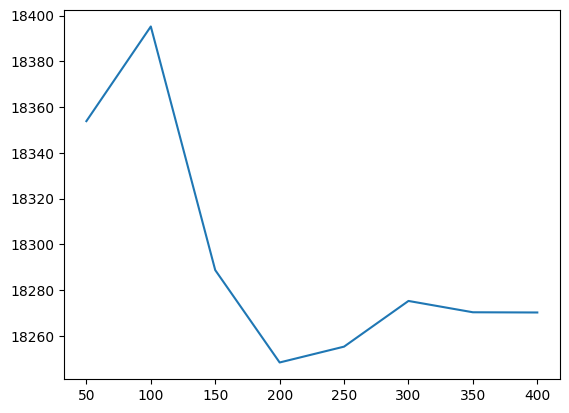

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

#### Step 3: Find the best parameter value

Given the results, which value for `n_estimators` seems best for the random forest model?  Use your answer to set the value of `n_estimators_best`.

### XGBoost

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
# Read the data
X = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0,subset=['SalePrice'],inplace=True) 
y = X.SalePrice 
X.drop(['SalePrice'],axis=1,inplace=True) 

# Break off validation set from training data
X_train_full,X_valid_full,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42) 

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy() 
X_valid = X_valid_full[my_cols].copy() 
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train) 
X_valid = pd.get_dummies(X_valid) 
X_test = pd.get_dummies(X_test) 
X_train, X_valid = X_train.align(X_valid, join='left', axis=1) 
X_train, X_test = X_train.align(X_test, join='left', axis=1)


### Step 1: Build model

#### Part A

In this step, you'll build and train your first model with gradient boosting.

- Begin by setting `my_model_1` to an XGBoost model.  Use the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class, and set the random seed to 0 (`random_state=0`).  **Leave all other parameters as default.**
- Then, fit the model to the training data in `X_train` and `y_train`.

In [3]:
from xgboost import XGBRegressor 

my_model_1 = XGBRegressor(random_state=0) 

# Fit the model 
my_model_1.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Part B

Set `predictions_1` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.

In [4]:
from sklearn.metrics import mean_absolute_error

predictions_1 = my_model_1.predict(X_valid) 

### Part C

Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions for the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In [5]:
# Calculate MAE
mae_1 = mean_absolute_error(y_valid,predictions_1) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)


Mean Absolute Error: 17958.89453125


### Step 2: Improve the model

Now that you've trained a default model as baseline, it's time to tinker with the parameters, to see if you can get better performance!
- Begin by setting `my_model_2` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to get better results.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_2` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_2` must attain lower MAE than the model in `my_model_1`. 

In [6]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train,y_train) # Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_valid) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2,y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)


Mean Absolute Error: 18019.794921875


### Step 3: Break the model

In this step, you will create a model that performs worse than the original model in Step 1.  This will help you to develop your intuition for how to set parameters.  You might even find that you accidentally get better performance, which is ultimately a nice problem to have and a valuable learning experience!
- Begin by setting `my_model_3` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to design a model to get high MAE.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_3` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_3` must attain higher MAE than the model in `my_model_1`. 

In [7]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=1)

# Fit the model
my_model_3.fit(X_train, y_train)

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)
print("Mean Absolute Error:" , mae_3)

Mean Absolute Error: 46281.8359375


### Data Leakage

### Step 1: The Data Science of Shoelaces

Nike has hired you as a data science consultant to help them save money on shoe materials. Your first assignment is to review a model one of their employees built to predict how many shoelaces they'll need each month. The features going into the machine learning model include:
- The current month (January, February, etc)
- Advertising expenditures in the previous month
- Various macroeconomic features (like the unemployment rate) as of the beginning of the current month
- The amount of leather they ended up using in the current month

The results show the model is almost perfectly accurate if you include the feature about how much leather they used. But it is only moderately accurate if you leave that feature out. You realize this is because the amount of leather they use is a perfect indicator of how many shoes they produce, which in turn tells you how many shoelaces they need.

Do you think the _leather used_ feature constitutes a source of data leakage? If your answer is "it depends," what does it depend on?

After you have thought about your answer, check it against the solution below.